# Projeto de Programação em Inteligência Artificial - Otimização
IA 2021/1 TRAB1 - Eduardo Rigamonte Costa

### 1.   Introdução

Neste trabalho proposto será analisado o desempenho do algoritmo genético através de três problemas de otimização: Problema do caixeiro viajante (travelling salesman problem - TSP), Regressão de Funções Periódicas e o Busca de hiperparâmetros e feature selection.

###2.   Biblioteca



In [1]:
!python --version

Python 3.7.11


In [2]:
### command for pip multiple package install (work on Colab)
!yes| pip install numpy pandas scipy scikit-learn matplotlib seaborn tqdm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [4]:
cd /content/gdrive/MyDrive/python

/content/gdrive/MyDrive/python


In [5]:
!ls

data  main.py  __pycache__  src


In [6]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing
import datetime
import time
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
start_time = time.time()
datetime.datetime.now()

datetime.datetime(2021, 8, 7, 12, 25, 53, 115796)

In [7]:
from src.problem.tsp_problem import TSPProblem
from src.problem.regression_problem import RegressionProblem
from src.problem.classification_problem import ClassificationProblem
from src.algorithm.genetic_algorithm import genetic_algorithm, generate_report, plot_history, plot_best_solution

In [8]:
def execute(problem, population_size, n_generations, mutation_rate, number_iterations):
  output_bests_solution,  output_bests_fitness, output_bests_fitness_generation, output_time = [], [], [], []

  for _ in range(number_iterations):
      bs, bfg, t = [], [], -1

      bs, bfg, t = genetic_algorithm(
          problem,
          population_size,
          n_generations,
          mutation_rate)

      output_bests_solution.append(bs)
      output_bests_fitness_generation.append(bfg)
      output_time.append(t)
  return output_bests_solution, output_bests_fitness_generation, output_time

### 3. Algoritmo Genético

O algoritmo genético implementado utilizou as seguintes lógicas para o desenvolvimento:

1. Selection

>> Foram realizados experimentos com duas lógicas de seleção: por torneio e por proporção. Verifiquei que após trocar a seleção de torneiro para por proporção, a evolução da função objetivo aconteceu de uma forma mais intensa. 

>>Por ter que tratar a fitness para uma minimização do resultado, precisei inverter a lógica substituindo todos os elementos pelo resultado do valor do maior elemento da lista subtraido pelo valor do elemento. Além disso, também foi necessário verificar se a lista possuia algum valor negativo, se houvesse, o modulo do elemento com menor valor negativo deveria ser somado a cada elemento da lista.

2. Crossover

>> Não há considerações

3. Mutation

>> Utilizado uma probabilidade de mutação para cada um dos filhos gerados. Durante o desenvolvimento, tive um problema com o sinal ">" dentro do condicional o que fez com que a mutação fosse realizada em 90% dos casos, quando isso ocorreu a função objetivo não retornava bons resultados.

4. Elitismo

>> Foram realizados experimentos com duas formas de elitismo. A primeira forma consiste em sempre trocar um individuo aleatório da nova geração pelo melhor da geração passada, já a segunda forma consiste em realizar uma junção entre os individuos da nova geração com a geração anterior, ordenar pela fitness e retornar os melhores individuos. 

>>Observei que a primeira solução funciona bem quando a quantidade da população é pequena (10, por exemplo), porém, quando a população aumenta a solução não retorna bons resultados. A segunda forma funciona bem com ambas quantidades e por isso preferi por ela.

###4.   Execução do experimento - TSProblem


Nesta rodada do experimento serão 5 rodadas de execuções com os parâmetros sugeridos de population_size = 200 e n_generations=1000. 

Os códigos de plotagem foram importados do projeto.

In [ ]:
tsp_population_size = 200
tsp_n_generations = 1000
tsp_mutation_rate = 0.1
tsp_problem = TSPProblem("data/tsp/tsp-30.txt")
tsp_number_iterations = 5

In [ ]:
tsp_best_solutions, tsp_output_bests_fitness_generation, tsp_output_time = execute(tsp_problem, tsp_population_size, tsp_n_generations, tsp_mutation_rate, tsp_number_iterations)

In [ ]:
generate_report(tsp_best_solutions, tsp_output_time)

         max        min       media  d. padrao  tempo total (s)
0  128.38381  98.583273  117.700498  11.754077        98.626249


Fitness: 98.5832731911694


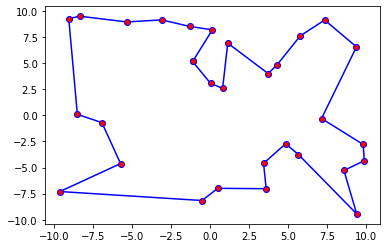

Fitness: 109.37003967894705


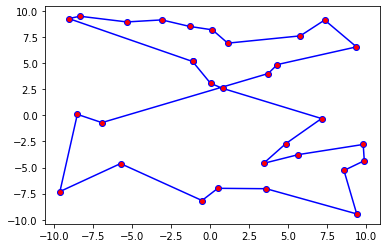

Fitness: 125.28534545301493


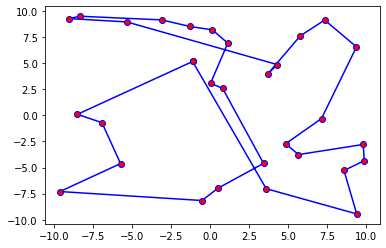

Fitness: 126.8800230799156


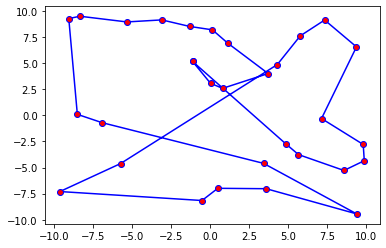

Fitness: 128.38381032857342


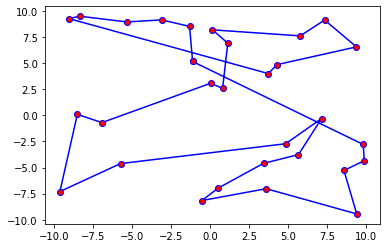

In [ ]:
plot_best_solution(tsp_problem, tsp_best_solutions)

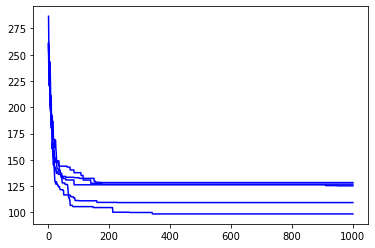

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history(tsp_output_bests_fitness_generation, tsp_n_generations)

#### Considerações TSP Problem

1. O que mudou entre as execuções?
> Em todas as iterações, a função objetivo apresentou melhoria ao passar de geração em geração. Uma das execuções, aparentemente encontrou o melhor caminho e outras aparentemente ficaram presas em um mínimo local por muitas gerações.
2. Pelas visualizações, os resultados foram satisfatórios?
> Sim, apesar de ter um desvio padrão um pouco elevado, foi possivel encontrar uma solução ótima.
3. A solução parece ter se aproximado do ótimo?
> Sim, por conseguir ver o gráfico é possível afirmar que foi encontrado o melhor caminho.



### 5.   Execução do experimento - RegressionProblem


Nesta rodada do experimento serão 5 rodadas de execuções com os parâmetros sugeridos de population_size = 200 e n_generations=1000. O intervalo dos coeficientes vários entre -100 e 100.

Os códigos de plotagem foram importados do projeto.

In [ ]:
regression_population_size = 200
regression_n_generations = 1000
regression_mutation_rate = 0.1
regression_problem = RegressionProblem("data/regression/data-3.txt")
regression_number_iterations = 5

In [ ]:
regression_best_solutions, regression_output_bests_fitness_generation, regression_output_time = execute(regression_problem, regression_population_size, regression_n_generations, regression_mutation_rate, regression_number_iterations)

In [ ]:
generate_report(regression_best_solutions, regression_output_time)

         max       min     media  d. padrao  tempo total (s)
0  10.503985  2.018624  5.789452   3.023756       127.742098


Fitness: 2.0186240913845457


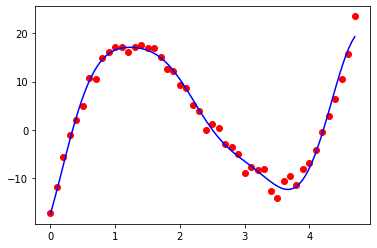

Fitness: 3.1705369837941277


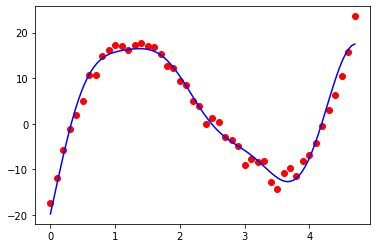

Fitness: 5.917250242192029


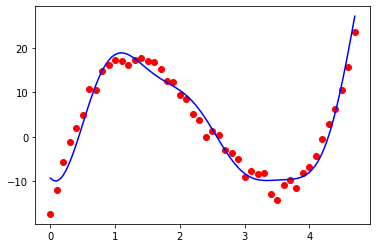

Fitness: 7.336866150113174


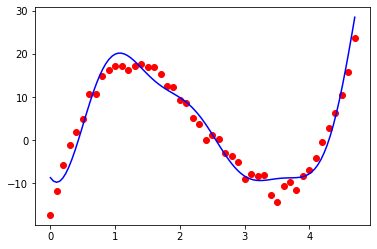

Fitness: 10.50398472342634


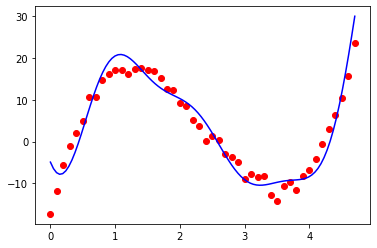

In [ ]:
plot_best_solution(regression_problem, regression_best_solutions)

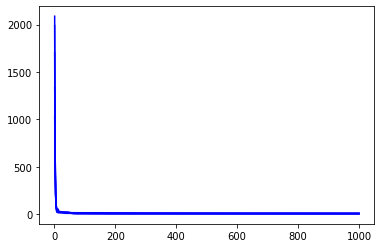

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history(regression_output_bests_fitness_generation, regression_n_generations)

#### Considerações Regression Problem

1. O que mudou entre as execuções?
>Em todas as iterações a função objetivo obteve uma intensa melhora nas primeiras gerações e após poucas melhorias foram encontradas, todas iterações convergiram para resultados bem próximos.
2. Pelas visualizações, os resultados foram satisfatórios?
> Sim, a linha da função encontrada acompanha os pontos em todos os gráficos retornados.
3. A solução parece ter se aproximado do ótimo?
> Sim, a solução se aproximou do resultado ótimo, porém, já encontrei resultados de fitness menores em testes anteriores.



### 6.   Execução do experimento - ClassificationProblem

Nesta rodada do experimento serão 5 rodadas de execuções com os parâmetros sugeridos de population_size = 200 e n_generations=500.

In [9]:
classification_population_size = 200
classification_n_generations = 500
classification_mutation_rate = 0.1
classification_problem = ClassificationProblem("data/german_statlog/german.data-numeric")
classification_number_iterations = 5

In [10]:
classification_best_solutions, classification_output_bests_fitness_generation, classification_output_time = execute(classification_problem, classification_population_size, classification_n_generations, classification_mutation_rate, classification_number_iterations)

In [11]:
generate_report(classification_best_solutions, classification_output_time)

   max       min     media  d. padrao  tempo total (s)
0 -0.8 -0.806667 -0.802667   0.002494      1847.074775


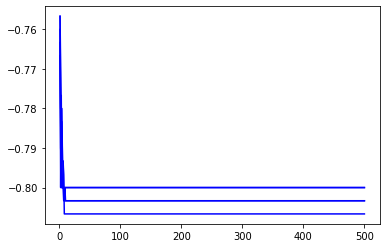

<Figure size 432x288 with 0 Axes>

In [12]:
plot_history(classification_output_bests_fitness_generation, classification_n_generations)

#### Considerações Classification Problem

1. O que mudou entre as execuções?
>Em todas as iterações a função objetivo obteve uma intensa melhora e após isso pareceu ter encontrado um mínimo local e ter ficado na região até o fim da execução.
2. Pelas visualizações, os resultados foram satisfatórios?
> Sim, o resultado é satisfatorio, pois eles convergem mostrando que não estão longe de um bom resultado.
3. A solução parece ter se aproximado do ótimo?
> Sim, a solução se aproximou do resultado ótimo.



### 7.   Tempo e Dados da Plataforma



In [13]:
#Tempo final de execução do notebook em minutos
int(time.time() - start_time)/60

154.18333333333334

In [14]:
datetime.datetime.now()

datetime.datetime(2021, 8, 7, 15, 0, 4, 357026)

In [15]:
import platform
print(platform.machine())
print(platform.platform())
print('Processor: '+platform.processor())
print('Cores available: '+str(multiprocessing.cpu_count()))

x86_64
Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Processor: x86_64
Cores available: 2
